# Groupe5 - Apprentissage Artificiel

### FORDJOU KAMGANG Landry                            19M2366
### PANDJI TCHOUAKOUE Frank Manuel               19M2110
### AZESSIE NOGHIEWO Léonce                             19M2617
### EYENGA MINKONDA Laurentine Serena           19M2455


## TPE2: 
### Implémenter les codes des chapitres "Generate datasets in python" jusqu'à "Other intersting distributions"

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm
import sklearn.datasets as ds
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
iris = load_iris()

## Data preparation

Dans cette section, nous allons préparer notre dataset pour l'apprentissage, la validation et le test de notre modèle.

#### Vérifions l'ordre des données

In [115]:
print(iris.target)

# Le résulatat de cette commande nous montre que les données d'iris sont déjà regroupées en 3 classes de densité égale.
# Ce qui ne peut pas nous aider dans la construction de notre modèle.
# Nous devrons donc briser cet alignement en réarrangeant ces données.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### Ici  nous permutons les indices des données de manière aléatoires et stockons le résultat dans un tableau que nous affichons

In [116]:
indices = np.random.permutation(len(iris.data))
print(indices)

[148 105 110  17 140  77  47  69 137  91  97 106  39  82  54  87  67  52
  21 107  85  46  68 122 128  78   1  56 101   7 133 141  38  29  92 123
  45  81 119  43  70  80  62  76 116 131  60  42 126  25 138 120 127 108
  61  50  93  35 118  84  18 115 104  28  63  89  32  44  88   3 113  94
  73  59  75 149 112 111 143 125  65 139  24  96  34 132 144  23 136  66
  15  95  30  10 102  26  49  74  51 103 147 121  14  41  55 100   0  64
 124  53   5 142 134  33   8  57 146  99  36  31 130  98   6 129  40  20
  90 117  48  12  71  86 135   2  27  22 114 145  79  11  83  19  13   4
  72   9  58  37  16 109]


#### Nous découpons manuellement  les donées ainsi mélangées 

In [117]:
n_test_samples = 12
learnset_data = iris.data[indices[:-n_test_samples]]
learnset_labels = iris.target[indices[:-n_test_samples]]
testset_data = iris.data[indices[-n_test_samples:]]
testset_labels = iris.target[indices[-n_test_samples:]]
print(learnset_data[:4], learnset_labels[:4])
print(testset_data[:4], testset_labels[:4])

[[6.2 3.4 5.4 2.3]
 [7.6 3.  6.6 2.1]
 [6.5 3.2 5.1 2. ]
 [5.1 3.5 1.4 0.3]] [2 2 2 0]
[[5.7 2.6 3.5 1. ]
 [4.8 3.4 1.6 0.2]
 [6.  2.7 5.1 1.6]
 [5.1 3.8 1.5 0.3]] [1 0 1 0]


#### Nous découpons les données à l'aide de sklearn

In [118]:
# Le découpage se fait  à l'aide de la fonction 'train_test_split()' de scikit_learn
data, labels = iris.data, iris.target
res = train_test_split(data,
                       labels,
                        train_size = 0.8,
                       test_size = 0.2,
                       random_state = 42
                      )
train_data, test_data, train_labels, test_labels = res
n = 7
print(f"The {n} first datasets: ")
print(test_data[:7])
print(f"The corresponding {7} labels:")
print(test_labels[:7])

The 7 first datasets: 
[[6.1 2.8 4.7 1.2]
 [5.7 3.8 1.7 0.3]
 [7.7 2.6 6.9 2.3]
 [6.  2.9 4.5 1.5]
 [6.8 2.8 4.8 1.4]
 [5.4 3.4 1.5 0.4]
 [5.6 2.9 3.6 1.3]]
The corresponding 7 labels:
[1 0 2 1 1 0 1]


In [119]:
print('All:', np.bincount(labels) / float(len(labels)) * 100.0)
print('Training:', np.bincount(train_labels) / float(len(train_labels)) * 100.0)
print('Test:', np.bincount(test_labels) / float(len(test_labels))* 100.0)

All: [33.33333333 33.33333333 33.33333333]
Training: [33.33333333 34.16666667 32.5       ]
Test: [33.33333333 30.         36.66666667]


In [120]:
content = np.loadtxt("strange_flowers.txt", delimiter=" ")
data = content[:, :-1] # cut of the target column
labels = content[:, -1]
labels.dtype
labels.shape

(795,)

In [121]:
res = train_test_split(data,
                       labels,
                        train_size=0.8,
                        test_size=0.2,
                        random_state=42,
                        stratify=labels
                      )
train_data, test_data, train_labels, test_labels = res
# np.bincount expects non negative integers:
print('All:', np.bincount(labels.astype(int)) / float(len(labels)) * 100.0)
print('Training:', np.bincount(train_labels.astype(int)) / float(len(train_labels)) * 100.0)
print('Test:', np.bincount(test_labels.astype(int)) / float(len(test_labels)) * 100.0)

All: [ 0.         23.89937107 25.78616352 28.93081761 21.3836478 ]
Training: [ 0.         23.89937107 25.78616352 28.93081761 21.3836478 ]
Test: [ 0.         23.89937107 25.78616352 28.93081761 21.3836478 ]


### Generate datasets in python

In [122]:
# Nous créons un tableau 'cities' et un objet 'data' que nous regroupons enn un tableau à deux dimensions pour avoir un dataset 'df'
# dans lequel 'cities' représente la première colonne et chaque clé de 'data', les autres colonnes
cities = ['Berlin', 'Frankfurt', 'Hamburg',
            'Nuremberg', 'Munich', 'Stuttgart',
            'Hanover', 'Saarbruecken', 'Cologne',
            'Constance', 'Freiburg', 'Karlsruhe'
         ]
n= len(cities)
data = {'Temperature': np.random.normal(24, 3, n),
            'Humidity': np.random.normal(78, 2.5, n),
            'Wind': np.random.normal(15, 4, n)
        }
df = pd.DataFrame(data=data, index=cities)
df

,Temperature,Humidity,Wind
Berlin,22.639183,73.397283,21.455048
Frankfurt,26.880443,75.091505,11.691503
Hamburg,27.074422,78.281940,19.110568
Nuremberg,24.990976,74.784149,14.217405
Munich,22.900136,78.354395,13.298313
Stuttgart,24.435159,76.445387,15.094006
Hanover,23.516811,80.310624,19.329027
Saarbruecken,21.563683,74.095353,17.891122
Cologne,23.651149,79.385102,8.592318
Constance,25.177638,82.997333,9.483975


In [123]:
def truncated_normal(mean=0, sd=1, low=0, upp=10, type=int):
    return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

def truncated_normal_floats(mean=0, sd=1, low=0, upp=10, num=100):
    res = truncated_normal(mean=mean, sd=sd, low=low, upp=upp)
    return res.rvs(num)

def truncated_normal_ints(mean=0, sd=1, low=0, upp=10, num=100):
    res = truncated_normal(mean=mean, sd=sd, low=low, upp=upp)
    return res.rvs(num).astype(np.uint8)

# number of items for each flower class:

number_of_items_per_class = [190, 205, 230, 170]
flowers = {}


# flos Pythonem:
number_of_items = number_of_items_per_class[0]
reds = truncated_normal_ints(mean=254, sd=18, low=235, upp=256,num=number_of_items)
greens = truncated_normal_ints(mean=107, sd=11, low=88, upp=127,num=number_of_items)
blues = truncated_normal_ints(mean=0, sd=15, low=0, upp=20,num=number_of_items)
calyx_dia = truncated_normal_floats(3.8, 0.3, 3.4, 4.2,num=number_of_items)
data = np.column_stack((reds, greens, blues, calyx_dia))
flowers["flos_pythonem"] = data

# flos Java:
number_of_items = number_of_items_per_class[1]
reds = truncated_normal_ints(mean=245, sd=17, low=226, upp=256,
num=number_of_items)
greens = truncated_normal_ints(mean=107, sd=11, low=88, upp=127,
num=number_of_items)
blues = truncated_normal_ints(mean=0, sd=10, low=0, upp=20,
num=number_of_items)
calyx_dia = truncated_normal_floats(3.3, 0.3, 3.0, 3.5,
num=number_of_items)
data = np.column_stack((reds, greens, blues, calyx_dia))
flowers["flos_java"] = data


# flos Java:
number_of_items = number_of_items_per_class[2]
reds = truncated_normal_ints(mean=206, sd=17, low=175, upp=238,num=number_of_items)
greens = truncated_normal_ints(mean=99, sd=14, low=80, upp=120,num=number_of_items)
blues = truncated_normal_ints(mean=1, sd=5, low=0, upp=12,num=number_of_items)
calyx_dia = truncated_normal_floats(4.1, 0.3, 3.8, 4.4,num=number_of_items)
data = np.column_stack((reds, greens, blues, calyx_dia))
flowers["flos_margarita"] = data


# flos artificialis:
number_of_items = number_of_items_per_class[3]
reds = truncated_normal_ints(mean=255, sd=8, low=2245, upp=2255,num=number_of_items)
greens = truncated_normal_ints(mean=254, sd=10, low=240, upp=255,num=number_of_items)
blues = truncated_normal_ints(mean=101, sd=5, low=90, upp=112,num=number_of_items)
calyx_dia = truncated_normal_floats(2.9, 0.4, 2.4, 3.5,num=number_of_items)
data = np.column_stack((reds, greens, blues, calyx_dia))
flowers["flos_artificialis"] = data
data = np.concatenate((flowers["flos_pythonem"],
                       flowers["flos_java"],
                       flowers["flos_margarita"],
                       flowers["flos_artificialis"]),
                      axis=0
                     )


# assigning the labels
target = np.zeros(sum(number_of_items_per_class)) # 4 flowers
previous_end = 0
for i in range(1, 5):
    num = number_of_items_per_class[i-1]
    beg = previous_end
    target[beg: beg + num] += i
    previous_end = beg + num
conc_data = np.concatenate((data, target.reshape(target.shape[0],1)),
axis=1)
np.savetxt("strange_flowers.txt", conc_data, fmt="%2.2f",)

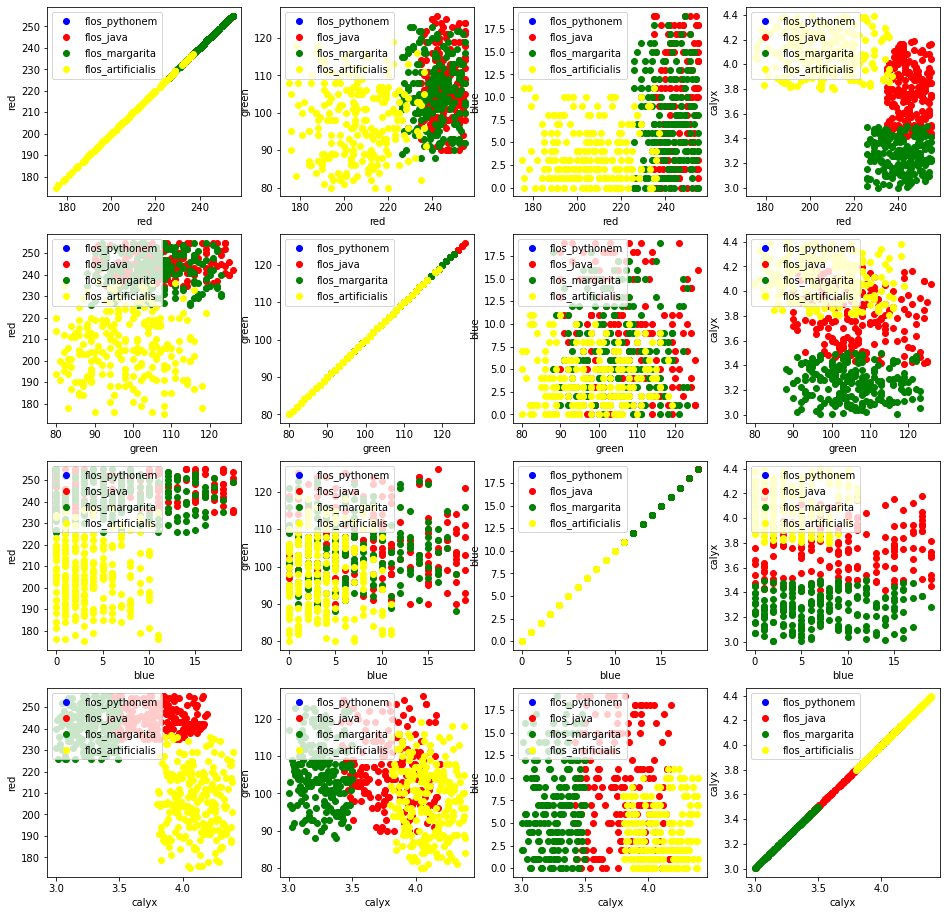

In [124]:
# On affiche nos différents datasets

target_names = list(flowers.keys())
feature_names = ['red', 'green', 'blue', 'calyx']
n = 4
fig, ax = plt.subplots(n, n, figsize=(16, 16))
colors = ['blue', 'red', 'green', 'yellow']
for x in range(n):
    for y in range(n):
        xname = feature_names[x]
        yname = feature_names[y]
        for color_ind in range(len(target_names)):
            ax[x, y].scatter(data[target==color_ind, x],
            data[target==color_ind, y],
                             label=target_names[color_ind],
                             c=colors[color_ind])
        ax[x, y].set_xlabel(xname)
        ax[x, y].set_ylabel(yname)
        ax[x, y].legend(loc='upper left')
        
plt.show()

## Generate synthetic data with sklearn

In [125]:
data, labels = make_blobs(n_samples=1000,
                            #centers=n_classes,
                            centers=np.array([[2, 3], [4, 5], [7,9]]),
                            random_state=1)
labels = labels.reshape((labels.shape[0],1))
all_data = np.concatenate((data, labels), axis=1)
all_data[:10]
np.savetxt("squirrels.txt", all_data)
all_data[:10]

array([[ 1.72415394,  4.22895559,  0.        ],
       [ 4.16466507,  5.77817418,  1.        ],
       [ 4.51441156,  4.98274913,  1.        ],
       [ 1.49102772,  2.83351405,  0.        ],
       [ 6.0386362 ,  7.57298437,  2.        ],
       [ 5.61044976,  9.83428321,  2.        ],
       [ 5.69202866, 10.47239631,  2.        ],
       [ 6.14017298,  8.56209179,  2.        ],
       [ 2.97620068,  5.56776474,  1.        ],
       [ 8.27980017,  8.54824406,  2.        ]])

In [126]:
a = np.array( [[1, 2], [3, 4]])
b = np.array( [5, 6])
b = b.reshape((b.shape[0], 1))
print(b)
x = np.concatenate( (a, b), axis=1)
x

[[5]
 [6]]


array([[1, 2, 5],
       [3, 4, 6]])

## Reading the data and conversion back into "data" and "labels"

In [127]:
file_data = np.loadtxt("squirrels.txt")
data = file_data[:,:-1]
labels = file_data[:,2:]
labels = labels.reshape((labels.shape[0]))

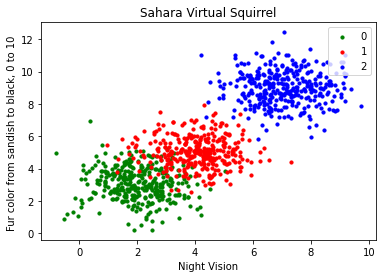

In [128]:
colours = ('green', 'red', 'blue', 'magenta', 'yellow', 'cyan')
n_classes = 3
fig, ax = plt.subplots()
for n_class in range(0, n_classes):
    ax.scatter(data[labels==n_class, 0], data[labels==n_class,1],
    c=colours[n_class], s=10, label=str(n_class))
ax.set(xlabel='Night Vision',
    ylabel='Fur color from sandish to black, 0 to 10 ',
    title='Sahara Virtual Squirrel')

ax.legend(loc='upper right')

In [129]:
data_sets = train_test_split(data,
                             labels,
                             train_size=0.8,
                             test_size=0.2,
                             random_state=42 # garantees same output for every run
                            )
train_data, test_data, train_labels, test_labels = data_sets

In [130]:
# import model
from sklearn.neighbors import KNeighborsClassifier
# create classifier
knn = KNeighborsClassifier(n_neighbors=8)
# train
knn.fit(train_data, train_labels)
# test on test data:
calculated_labels = knn.predict(test_data)
calculated_labels

array([2., 0., 1., 1., 0., 1., 2., 2., 2., 2., 0., 1., 0., 0., 1., 0., 1.,
       2., 0., 0., 1., 2., 1., 2., 2., 1., 2., 0., 0., 2., 0., 2., 2., 0.,
       0., 2., 0., 0., 0., 1., 0., 1., 1., 2., 0., 2., 1., 2., 1., 0., 2.,
       1., 1., 0., 1., 2., 1., 0., 0., 2., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 2., 1., 2., 0., 2., 1.,
       1., 0., 2., 2., 2., 0., 1., 1., 1., 2., 2., 0., 2., 2., 2., 2., 0.,
       0., 1., 1., 1., 2., 1., 1., 1., 0., 2., 1., 2., 0., 0., 1., 0., 1.,
       0., 2., 2., 2., 1., 1., 1., 0., 2., 1., 2., 2., 1., 2., 0., 2., 0.,
       0., 1., 0., 2., 2., 0., 0., 1., 2., 1., 2., 0., 0., 2., 2., 0., 0.,
       1., 2., 1., 2., 0., 0., 1., 2., 1., 0., 2., 2., 0., 2., 0., 0., 2.,
       1., 0., 0., 0., 0., 2., 2., 1., 0., 2., 2., 1., 2., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 2., 0., 2., 2., 1., 1., 1., 2.])

In [131]:
print("Accuracy:", metrics.accuracy_score(test_labels, calculated_labels))

Accuracy: 0.97


## Other interesting distributions

In [132]:
data, labels = ds.make_moons(n_samples=150,
                             shuffle=True,
                             noise=0.19,
                             random_state=None
                            )
data += np.array(-np.ndarray.min(data[:,0]),
                 -np.ndarray.min(data[:,1]))
np.ndarray.min(data[:,0]), np.ndarray.min(data[:,1])

(0.0, 0.5757283734108887)

[Text(0, 0.5, 'Y'), Text(0.5, 0, 'X'), Text(0.5, 1.0, 'Moons')]

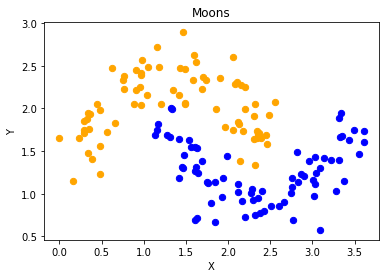

In [133]:
fig, ax = plt.subplots()
ax.scatter(data[labels==0, 0], data[labels==0, 1],c='orange', s=40, label='oranges')
ax.scatter(data[labels==1, 0], data[labels==1, 1],c='blue', s=40, label='blues')
ax.set(xlabel='X',ylabel='Y',title='Moons')

#ax.legend(loc='upper right')

In [134]:
min_x_new, max_x_new = 33, 88
min_y_new, max_y_new = 12, 20
data, labels = ds.make_moons(n_samples=100,shuffle=True,noise=0.05,random_state=None)
min_x, min_y = np.ndarray.min(data[:,0]), np.ndarray.min(data[:,1])
max_x, max_y = np.ndarray.max(data[:,0]), np.ndarray.max(data[:,1])

#data -= np.array([min_x, 0])
#data *= np.array([(max_x_new - min_x_new) / (max_x - min_x), 1])
#data += np.array([min_x_new, 0])
#data -= np.array([0, min_y])
#data *= np.array([1, (max_y_new - min_y_new) / (max_y - min_y)])
#data += np.array([0, min_y_new])

data -= np.array([min_x, min_y])
data *= np.array([(max_x_new - min_x_new) / (max_x - min_x), (max_y_new - min_y_new) / (max_y - min_y)])
data += np.array([min_x_new, min_y_new])
#np.ndarray.min(data[:,0]), np.ndarray.max(data[:,0])
data[:6]

array([[63.1305916 , 12.79579615],
       [62.96145692, 12.98731241],
       [33.        , 15.59344019],
       [69.72668263, 15.63204315],
       [48.01551153, 19.50507521],
       [61.8698939 , 18.51325016]])

In [135]:
def scale_data(data, new_limits, inplace=False ):
    if not inplace:
        data = data.copy()
        
    min_x, min_y = np.ndarray.min(data[:,0]), np.ndarray.min(data[:,1])
    max_x, max_y = np.ndarray.max(data[:,0]), np.ndarray.max(data[:,1])
    min_x_new, max_x_new = new_limits[0]
    min_y_new, max_y_new = new_limits[1]
    data -= np.array([min_x, min_y])
    data *= np.array([(max_x_new - min_x_new) / (max_x - min_x),(max_y_new - min_y_new) / (max_y - min_y)])
    data += np.array([min_x_new, min_y_new])
    
    if inplace:
        return None
    else:
        return data
    
data, labels = ds.make_moons(n_samples=100,
                             shuffle=True,
                             noise=0.05,
                             random_state=None
                            )
scale_data(data, [(1, 4), (3, 8)], inplace=True)

data[:10]

array([[2.95479617, 5.25128167],
       [3.42478898, 3.46380035],
       [3.97816413, 6.18108411],
       [3.00487411, 4.91735947],
       [2.52433219, 3.92597042],
       [2.8921412 , 5.80519487],
       [3.9422174 , 5.66215957],
       [2.43358979, 3.68874691],
       [3.67377127, 4.05140396],
       [1.15656343, 5.96311634]])

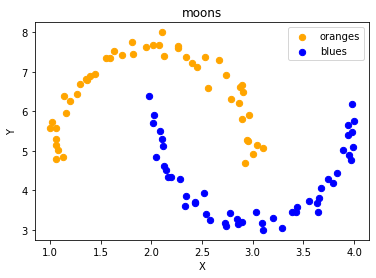

In [136]:
fig, ax = plt.subplots()
ax.scatter(data[labels==0, 0], data[labels==0, 1],c='orange', s=40, label='oranges')
ax.scatter(data[labels==1, 0], data[labels==1, 1],c='blue', s=40, label='blues')
ax.set(xlabel='X',ylabel='Y',
title='moons')
ax.legend(loc='upper right')

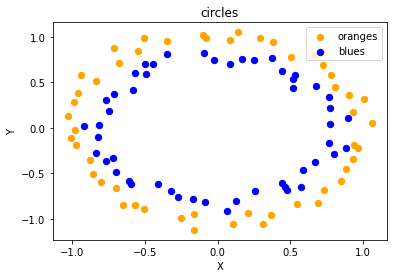

In [137]:
data, labels = ds.make_circles(n_samples=100,
                               shuffle=True,
                               noise=0.05,
                               random_state=None
                              )
fig, ax = plt.subplots()
ax.scatter(data[labels==0, 0],
           data[labels==0, 1],
           c='orange', s=40,
           label='oranges'
          )
ax.scatter(data[labels==1, 0], data[labels==1, 1],
           c='blue',
           s=40,
           label='blues'
          )
ax.set(xlabel='X',
       ylabel='Y',
       title='circles'
      )
ax.legend(loc='upper right')

Automatically created module for IPython interactive environment


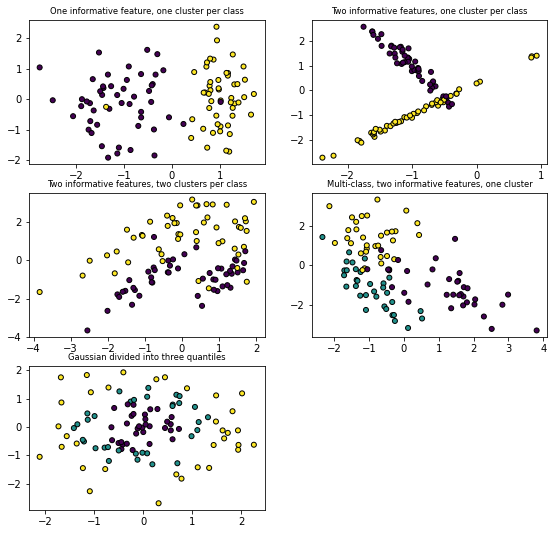

In [138]:
print(__doc__)

from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles

plt.figure(figsize=(8, 8))
plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)
plt.subplot(321)
plt.title("One informative feature, one cluster per class", fontsize='small')
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=1,n_clusters_per_class=1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,s=25, edgecolor='k')
plt.subplot(322)
plt.title("Two informative features, one cluster per class", fontsize='small')
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2,n_clusters_per_class=1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,s=25, edgecolor='k')
plt.subplot(323)
plt.title("Two informative features, two clusters per class",fontsize='small')
X2, Y2 = make_classification(n_features=2,n_redundant=0,n_informative=2)
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2,s=25, edgecolor='k')
plt.subplot(324)
plt.title("Multi-class, two informative features, one cluster",fontsize='small')
X1, Y1 = make_classification(n_features=2,n_redundant=0,n_informative=2,n_clusters_per_class=1,n_classes=3)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,s=25, edgecolor='k')
plt.subplot(325)
plt.title("Gaussian divided into three quantiles", fontsize='small')
X1, Y1 = make_gaussian_quantiles(n_features=2, n_classes=3)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,s=25, edgecolor='k')
          
plt.show()

### Exercice

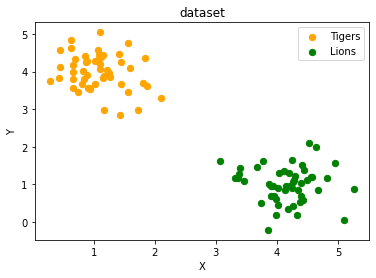

In [139]:
data, labels = make_blobs(n_samples=100,
                          cluster_std = 0.5,
                          centers=[[1, 4],[4, 1]],
                          random_state=1
                         )
fig, ax = plt.subplots()
colours = ["orange", "green"]
label_name = ["Tigers", "Lions"]
for label in range(0, 2):
    ax.scatter(data[labels==label, 0],
               data[labels==label, 1],
               c=colours[label], s=40,
               label=label_name[label]
              )
ax.set(xlabel='X',
        ylabel='Y',
        title='dataset'
        )
ax.legend(loc='upper right')
plt.show()

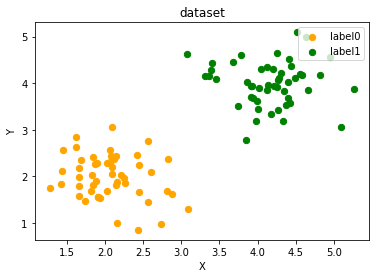

In [140]:
data, labels = make_blobs(n_samples=100,
                          cluster_std = 0.5,
                          centers=[[2, 2] ,[4, 4]],
                          random_state=1
                         )
fig, ax = plt.subplots()
colours = ["orange", "green"]
label_name = ["label0", "label1"]
for label in range(0, 2):
    ax.scatter(data[labels==label, 0],
               data[labels==label, 1],
               c=colours[label],
               s=40,
               label=label_name[label]
              )
ax.set(xlabel='X',
       ylabel='Y',
       title='dataset'
      )
ax.legend(loc='upper right')

plt.show()

In [141]:
import sklearn.datasets as ds
data, labels = ds.make_circles(n_samples=100,
                               shuffle=True,
                               noise=0.05,
                               random_state=42
                              )
centers = [[3, 4], [5, 3], [4.5, 6]]
data2, labels2 = make_blobs(n_samples=100,
                            cluster_std = 0.5,
                            centers=centers,
                            random_state=1
                           )
for i in range(len(centers)-1, -1, -1):
    labels2[labels2==0+i] = i+2
print(labels2)
labels = np.concatenate([labels, labels2])
data = data * [1.2, 1.8] + [3, 4]
data = np.concatenate([data, data2], axis=0)

[2 4 4 3 4 4 3 3 2 4 4 2 4 4 3 4 2 4 4 4 4 2 2 4 4 3 2 2 3 2 2 3 2 3 3 3 3
 3 4 3 3 2 3 3 3 2 2 2 2 3 4 4 4 2 4 3 3 2 2 3 4 4 3 3 4 2 4 2 4 3 3 4 2 2
 3 4 4 2 3 2 3 3 4 2 2 2 2 3 2 4 2 2 3 3 4 4 2 2 4 3]


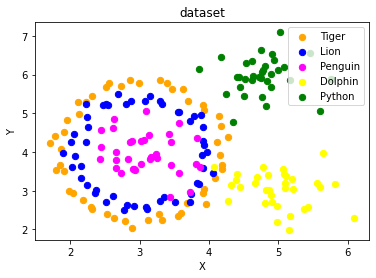

In [142]:
fig, ax = plt.subplots()
colours = ["orange", "blue", "magenta", "yellow", "green"]
label_name = ["Tiger", "Lion", "Penguin", "Dolphin", "Python"]
for label in range(0, len(centers)+2):
    ax.scatter(data[labels==label, 0],
               data[labels==label, 1],
               c=colours[label],
               s=40,
               label=label_name[label]
              )
ax.set(xlabel='X',
       ylabel='Y',
       title='dataset'
      )
ax.legend(loc='upper right')

plt.show()